# E-news Express Project

## Background ##

The design team of a company, E-news created a new landing page. Using A/B testing, we would like to investigate whether the new landing page is more effective to gather new subscribers, than the old landing page.  100 website users were randomly selected and divided equally into two groups. The old landing page was served to the first group (control group) and the new landing page was served to the second group (treatment group). Various data about the customers in both groups were collected in 'abtest.csv'. 

## Objective ##

The objective of this project is to perform Exploratory and Statistical analysis to answer the following questions using the collected data considering a significance level of 0.05 for all tests:

* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater 
  than the conversion rate for the    old page?
* Does the converted status depend on the preferred language?
* Is the mean time spent on the new page same for the different language users?

### 1.1 Importing the necessary libraries for EDA ###

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

### 1.2 Importing the Dataset ###

In [208]:
#imports csv file
data = pd.read_csv ('abtest.csv')

In [342]:
# copying data to another variable to avoid any changes to original data
abtest=data.copy()


### 1.3 Read the first and last 5 rows of the dataset ###

In [6]:
abtest.head() #read the top 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
abtest.tail() #read the last 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**_Observation_**

* User_id represents the user ID of the person visiting the website. 
* Group column shows whether the user belongs to the Control group or the Treatment group.
* Landing Page column shows whether the landing page is old or new. 
* Time_spent_on_the_page represents the time in minutes the user spent on the landing page. 
* Converted represents whether the user gets converted or not. 
* Language_preferred represents the language chosen by the user to view the landing page. 

### 1.4 Checking the shape of the dataset ###

In [8]:
abtest.shape

(100, 6)

**_Observation_**

Dataset has 100 rows, 6 Columns.This means the rows capture all 100 sampled website visitors.

### 1.5 Checking the dataframe info ###

In [9]:
# Now, let us see if the variables have the right datatypes for our analysis
# and also if there are any missing values.

abtest.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**_Observations_**

* All columns have 100 observations, confirming that there are no missing values
* Features like 'group', 'landing_page', 'converted' and 'language_preferred' ought to be in category datatype. As such, we will proceed to convert them from object to category datatype. 

### 1.5 Fixing the data types ###

In [14]:
abtest ['group']=abtest['group'].astype('category')
abtest ['landing_page']=abtest['landing_page'].astype('category')
abtest ['converted']=abtest['converted'].astype('category')
abtest ['language_preferred']=abtest['language_preferred'].astype('category')

In [15]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


* datatype of all columns have been fixed. 

### 1.6 Give a statistical summary for the dataset ###

In [104]:
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Summary of Control group only ###

In [344]:
ctrl_df = abtest.loc[abtest['group'] == 'control']
ctrl_df.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546566.50000,4.532400
std,17.67767,2.581975
min,546493.00000,0.190000
25%,546555.25000,2.720000
50%,546567.50000,4.380000
75%,546579.75000,6.442500
max,546592.00000,10.300000


**_Observation_**

* The mean time spent on the page by the Control group is approximately 4.53(mins)

### Summary of Treatment group only ###

In [346]:
trtm_df = abtest.loc[abtest['group'] == 'treatment']
trtm_df.describe()

,user_id,time_spent_on_the_page
count,50.00000,50.000000
mean,546467.50000,6.223200
std,14.57738,1.817031
min,546443.00000,1.650000
25%,546455.25000,5.175000
50%,546467.50000,6.105000
75%,546479.75000,7.160000
max,546492.00000,10.710000


**_Observation_**

* The mean time spent on the page by the treatment group is approximately 6.22(mins)

&nbsp;

### EXPLORATORY DATA ANALYSIS ###

### Univariate Analysis ###

### Observation on Group ###

In [25]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

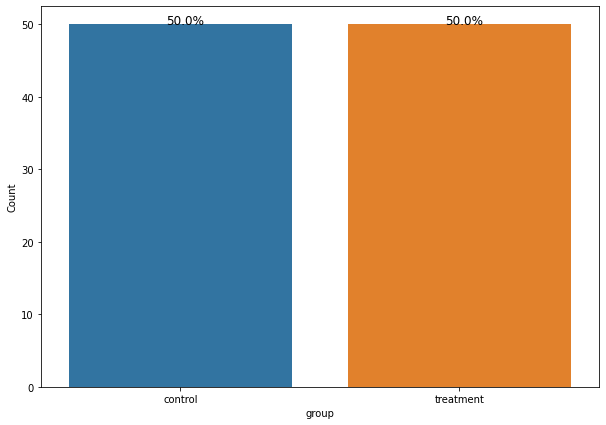

In [27]:
plt.figure(figsize=(10,7))
ax = sns.countplot(abtest['group'])
plt.xlabel('group')
plt.ylabel('Count')
bar_perc(ax,df['group'])

**_Observation_**

* Histogram confirms an even representation of both groups in the experiment at 50% each.

&nbsp;

### Observation on Landing Page ###

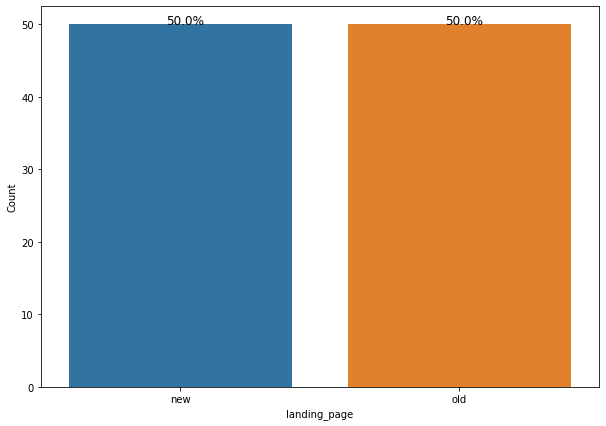

In [29]:
plt.figure(figsize=(10,7))
ax = sns.countplot(abtest['landing_page'])
plt.xlabel('landing_page')
plt.ylabel('Count')
bar_perc(ax,abtest['landing_page'])

**_Observation_**

* Histogram confirms an even assignment (prior to experiment) of new and old landing pages to the Control and Treatment groups

### Observation on Converted ###

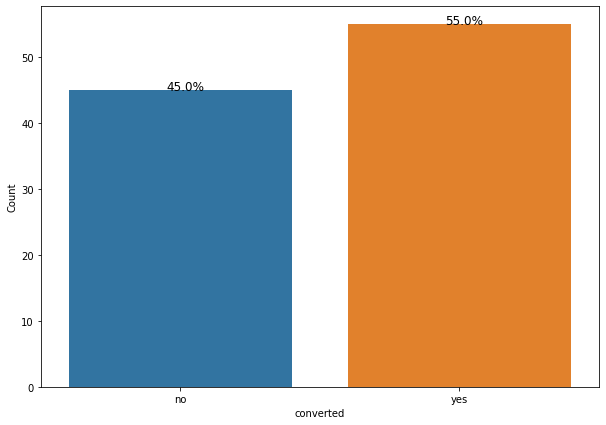

In [33]:
plt.figure(figsize=(10,7))
ax = sns.countplot(abtest['converted'])
plt.xlabel('converted')
plt.ylabel('Count')
bar_perc(ax,abtest['converted'])

**_Observation_**

* There were more conversions than non conversions across the board. 

### Observation on Language Preferred ###

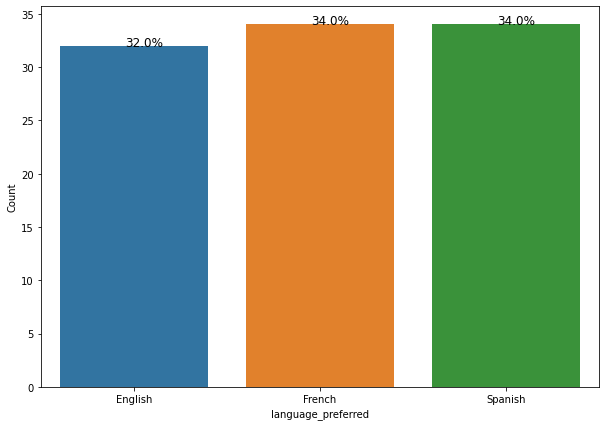

In [35]:
plt.figure(figsize=(10,7))
ax = sns.countplot(abtest['language_preferred'])
plt.xlabel('language_preferred')
plt.ylabel('Count')
bar_perc(ax,abtest['language_preferred'])

**_Observation_**

* French and Spanish were the most preferred languages, slightly over English

### Observation on time spent on the page ###

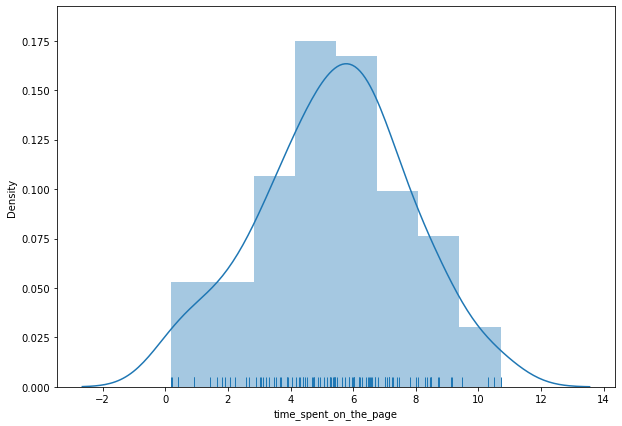

In [43]:
plt.figure(figsize=(10,7))
sns.distplot (abtest['time_spent_on_the_page'], rug = True)
plt.show()

**_Observation_**

* the histogram of "time spent on the page" shows an approximate continuous uniform distribution, with a mean of 5.37 (mins) and a standard deviation of 2.37(mins)

### Bivariate Analysis ###

### Observing mean time spent on the page by each group

In [350]:
abtest.groupby("group").time_spent_on_the_page.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
group,,,,,
control,50,4.380,4.5324,2.581975,10.30
treatment,50,6.105,6.2232,1.817031,10.71


**_Observation_**

* Mean time spent by Treatment group is higher than the meant time by Control group. This information will be used for statistical analysis later on.

<AxesSubplot:xlabel='group', ylabel='time_spent_on_the_page'>

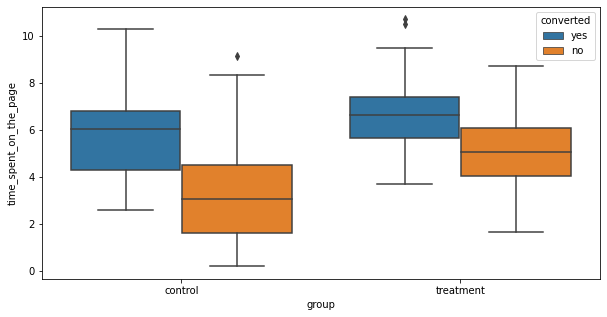

In [355]:
# Let us visualize the mean time against the groups.
plt.figure (figsize= (10,5))
sns.boxplot (x = 'group', y= 'time_spent_on_the_page', data = abtest, hue = 'converted')

**_Observation_**

* It is observed here again, that the mean time spent by the treatment group is higher than the mean time spent by control group.
* The mean time spent by those converted in either group is more than the mean time spent by those that did not convert. 

### Analyze which landing page had most conversions ###

converted     no  yes
landing_page         
new           18   32
old           27   23


Text(0.5, 1.0, 'SUBSCRIPTION BY LANDING PAGE')

<Figure size 720x504 with 0 Axes>

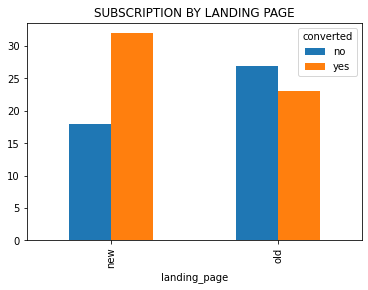

In [352]:
# do a crosstab
plt.figure (figsize = (10,7))
lc =pd.crosstab(abtest['landing_page'],abtest['converted'] )
print(lc)
lc.plot(kind='bar')
plt.title("SUBSCRIPTION BY LANDING PAGE")


**_Observation_**

* The new landing page reaped  more conversions/subscriptions than the old one.

### Analyze Group and language Preferred ###

language_preferred  English  French  Spanish
group                                       
control                  16      17       17
treatment                16      17       17


Text(0.5, 1.0, 'PREFERRED LANGUAGE BY GROUP')

<Figure size 720x720 with 0 Axes>

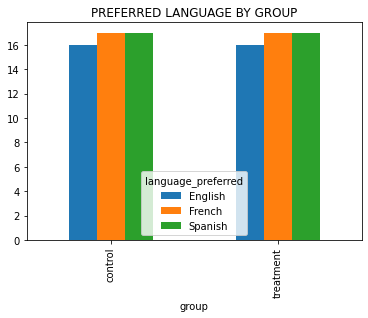

In [356]:
plt.figure (figsize = (10,10))
gl =pd.crosstab(abtest['group'],abtest['language_preferred'] )
print (gl)
gl.plot(kind='bar')
plt.title("PREFERRED LANGUAGE BY GROUP")

**_Observation_**

* languages preferred by both Control and Treatment group is even, with French and Spanish at a tie at 17 on each side, and english at 16 on each side.


### Analyze relationship between landing page and time spent ###

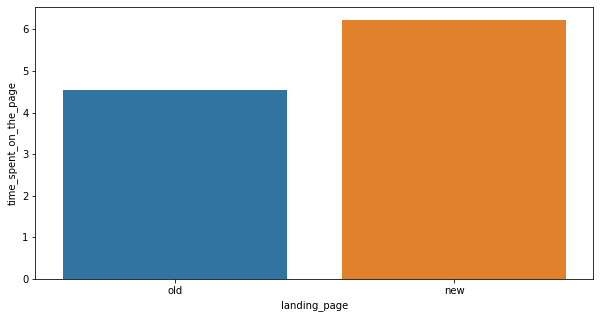

In [289]:
#plot barplot
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='landing_page', y='time_spent_on_the_page', data=abtest, ci=False)  # barplot

**_Observation_**

* Users spent more time on the new landing page than the old landing page
* It will be interesting to know the relationship between time spent and the conversion/subscription

### Analyze how time spent on the landing page relates to conversion ###

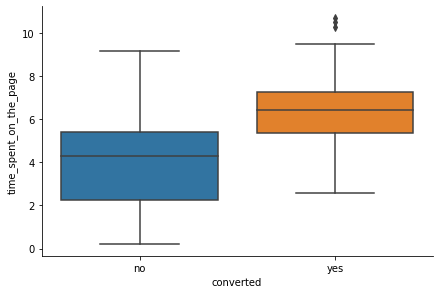

In [69]:
sns.catplot(x ='converted', y = 'time_spent_on_the_page',data = abtest, height=4, aspect=1.5, kind ='box');


**_Observation_**

* The mean and median time spent by visitors that converted or subscribed is higher than those that did not subscribe. 
* There is the possibliblity that visitors are more likely to subscribe if they spend more time on the landing page. This will be analysed further. 

### Observe the relationship between conversion and preferred language ###

language_preferred  English  French  Spanish
converted                                   
0                        12      17       16
1                        20      17       18


Text(0.5, 1.0, 'CONVERSION BY PREFERRED LANGUAGE')

<Figure size 720x504 with 0 Axes>

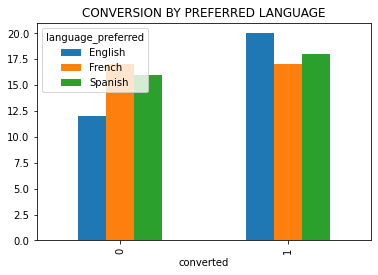

In [152]:
#using crosstab
plt.figure (figsize = (10,7))
cl =pd.crosstab(abtest['converted'],abtest['language_preferred'] )
print (cl)
cl.plot(kind='bar')
plt.title("CONVERSION BY PREFERRED LANGUAGE")

**_Observation_**

* For the converting visitors, the most preferred language was English. 
* For the non converting visitors, the most preferred language was French. 

&nbsp;

### STATISTICAL AND VISUAL ANALYSIS ###

In [154]:
#import necessary library
from scipy import stats


In [285]:
#let us replace yes and no in 'converted' to aid our statistical analysis
abtest.converted.replace(('yes', 'no'), (1, 0), inplace=True)
abtest

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,1,Spanish
1,546468,treatment,new,7.13,1,English
2,546462,treatment,new,4.40,0,Spanish
3,546567,control,old,3.02,0,French
4,546459,treatment,new,4.75,1,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,0,Spanish
96,546544,control,old,6.52,1,English
97,546472,treatment,new,7.07,1,Spanish
98,546481,treatment,new,6.20,1,Spanish


### Finding the conversion rate of both groups ###

In [286]:
#finding the conversion rate
abtestsum = abtest.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
abtestsum['total'] = abtest.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
abtestsum['rate'] = abtest.pivot_table(values='converted', index='group')
abtestsum

,converted,total,rate
group,,,
control,23,50,0.46
treatment,32,50,0.64


**_Observation_**

* The treatment group or the new landing page showed a higher conversion rate than the control group or old page

## Do the users spend more time on the new landing page than the old landing page? ###

The metric of interest here is "time_spent_on_the_landing_page". Use the p-value approach and a level of significance of 0.05. 

Now, let us conduct a two independent sample ttest on both groups:


### Justification for using 2 sample independent ttest ###

* Continuous data - Yes, the landing page time is measured on a continuous scale.
* Normally distributed populations - Yes
* Independent populations - As we are taking random samples for two different  users
* Equal population standard deviations - the population standard deviations may be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Formulate the null and alternative hypothesis ###


$H_0$: $\mu_{old} = \mu_{new}$, Time spent on the old landing page is equal to time spent on the new landing page

$H_a$: $\mu_{new} > \mu_{old}$, Visitors spent more time on the new landing page than the old landing page. 

In [212]:
#selecting dataframe of the control group only
ctrl_time = abtest.loc[abtest['group'] == 'control']


In [217]:
#selecting dataframe of the treatment group only
trmt_time = abtest.loc[abtest['group']== 'treatment']

In [315]:
significance = 0.05

#conducting independent ttest
t, p_value = stats.ttest_ind(trmt_time['time_spent_on_the_page'],ctrl_time['time_spent_on_the_page'],  equal_var = True, alternative = 'greater')
print("tstats = ",t, ", p_value = ", p_value)
if p_value > significance:
    print ("We do have have enough statistitcal evidence to reject the null hypothesis")
else:
    print ("Reject the null hypothesis - we can conclude that visitors spent more time on the new landing page than the old landing page.")


tstats =  3.7867702694199856 , p_value =  0.0001316123528095005
Reject the null hypothesis - we can conclude that visitors spent more time on the new landing page than the old landing page.


### Since p-value(0.0001) < 0.05 (alpha), we reject the null hypothesis and conclude that visitors spent more time on the new landing page than the old landing page. ###

&nbsp;

### Confirming the above via visualization ###

<Figure size 720x720 with 0 Axes>

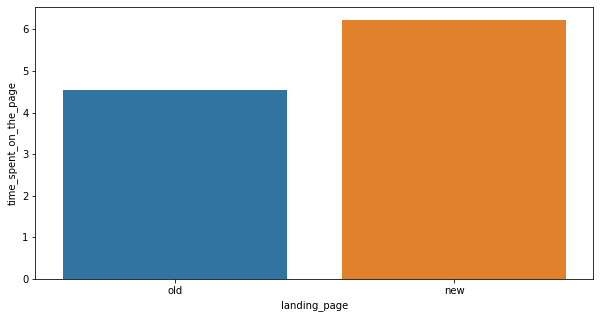

In [224]:
#plot barplot
plt.figure(figsize=(10,10))  # setting the figure size
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='landing_page', y='time_spent_on_the_page', data=abtest, ci=False)  # barplot

**_Observation_**

* Visitors spent more time on the new landing page than the old landing page.

&nbsp;

### Is the conversion rate for the new page greater than the conversion rate for the old page? ###

### Let's write the null and alternative hypothesis

Using two proportion z-test, 
Let $p_1,p_2$ be the proportions of conversion for the old page and new page respectively.

Let us test the null hypothesis:

>$H_0:p_{old} =p_{new}$

against the alternate hypothesis

>$H_a:p_{new} > p_{old}$

### Let us test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, the user either converted or did not convert.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. 

In [255]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

In [287]:
#finding the conversion rate
abtestsum = abtest.pivot_table(values='converted', index='group', aggfunc=np.sum)
# add additional columns to the pivot table
abtestsum['total'] = abtest.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
abtestsum['rate'] = abtest.pivot_table(values='converted', index='group')
abtestsum

,converted,total,rate
group,,,
control,23,50,0.46
treatment,32,50,0.64


In [314]:
significance = 0.05

# set conversions of visitors
visitor_conversions = np.array([32, 23])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(visitor_conversions, nobs, alternative = 'larger')
print('The p-value is ' + ' %0.3f' % (p_value))

if p_value > significance:
    print ("We do not have enough statistitcal evidence to reject the null hypothesis")
else:
    print ("Reject the null hypothesis - we can conclude that the conversion rate for the new page is greater than the old page.")


The p-value is  0.035
Reject the null hypothesis - we can conclude that the conversion rate for the new page is greater than the old page.


### since p-value is less than significance(0.05), we can conclude that the conversion rate for the new page is greater than the old page. ###

&nbsp;

### Does the converted status depend on the preferred language? ###

### Let's write the null and alternative hypothesis

Let us use Chi-square test for Independence

We will test the null hypothesis

>$H_0:$ conversion status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ conversion status depends on preferred language.

### Justification for using Chi-square test for independence are as follows:

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes

### Let's find the p-value

In [317]:
# first, let us use the 'crosstab' function to create a contingency table
chi_test = pd.crosstab(abtest.converted, abtest.language_preferred, margins=True)
chi_test

language_preferred,English,French,Spanish,All
converted,,,,
0,12,17,16,45
1,20,17,18,55
All,32,34,34,100


### import the required function
from scipy.stats import chi2_contingency

### find the p-value


In [338]:
chi, p_value, dof, expected = chi2_contingency(chi_test)
print('The p-value is', p_value)

The p-value is 0.980249223480077


### Since P-value is greater than the significance of 0.05, we do not have enough statistical evidence to reject the null hypothesis. Thus, the conversion status is independent of language preferred. ###

### Let us visualize the crosstab of 'converted' and 'language prefered'

Text(0.5, 1.0, 'CONVERSION BY PREFERRED LANGUAGE')

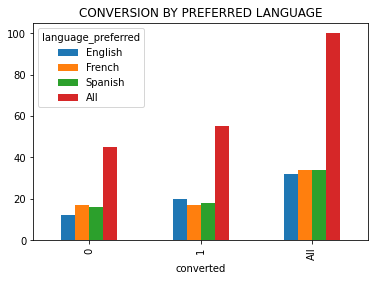

In [340]:
chi_test.plot(kind='bar') #barplot
plt.title("CONVERSION BY PREFERRED LANGUAGE")

### Observation ###

* this confirms the result of the chitest. The conversion status does not appear to be dependent on preferred language. 

&nbsp;

### Is the mean time spent on the new page same for the different language users?

### Let's write the null and alternative hypothesis
Usint one-way ANOVA test

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent by English, French and Spanish users on the new page respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time (spent on the new page) of one language is different from the others.

In [303]:
#selecting dataframe of the new page visitosrs only
new_page = abtest.loc[abtest['landing_page']== 'new']


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


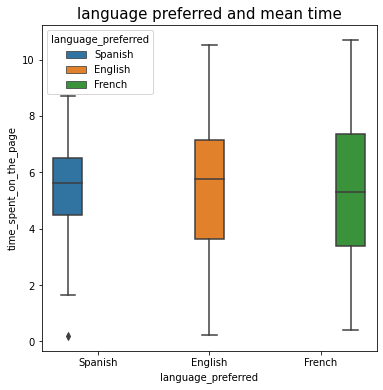

In [304]:
# mean of time spent by different language users
print(new_page.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = abtest, hue = 'language_preferred')
a.set_title("language preferred and mean time", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of varaince, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on new page follows a normal distribution 

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [306]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [307]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_page['time_spent_on_the_page'][new_page['language_preferred']=="English"], 
                                   new_page['time_spent_on_the_page'][new_page['language_preferred']=="French"], 
                                   new_page['time_spent_on_the_page'][new_page['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [313]:
#import the required function
from scipy.stats import f_oneway

significance = 0.05

# perform one-way anova test
test_stat, p_value = f_oneway(new_page.loc[new_page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              new_page.loc[new_page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

if p_value > significance:
    print ("We do not have enough statistitcal evidence to reject the null hypothesis. Thus, we can conclude that the mean time" 
           "spent on the new page by English, French and spanish users is not different")
else:
    print ("Reject the null hypothesis ")

The p-value is 0.43204138694325955
We do not have enough statistitcal evidence to reject the null hypothesis. Thus, we can conclude that the mean timespent on the new page by English, French and spanish users is not different


### Since P-value is more than significance (0.05),we do not have enough statistitcal evidence to reject the null hypothesis. Thus, we can conclude that the mean time spent on the new page by English, French and spanish users is not different. ### 

## Conclusion ##

* Users spent more time on the new landing page than the old landing page. This could be    potentially due to the volume of content or the kind of content displayed on the landing page.

* It is observed from the data that more time spent on the page increased the likelihood of subscription. 

* The conversion rate of the treatment group or of the new landing page is higher than the old page. 

* Preferred language is independent of time spent on the page and conversion rate.

* It is recommended that the new landing page replace the old one; or future landing pages should have similar content as the new landing page as it leads to more time spent on the page and consequently more subscriptions. 
